<img src="images/logo_datai.png" width="400" img style="float: right;"> 

https://www.unav.edu/web/instituto-de-ciencia-de-los-datos-e-inteligencia-artificial<br>
Author: Pablo Urruchi Mohino

### Tweets retriever from a specific account

In [2]:
# General:
import tweepy           # To consume Twitter's API
import pandas as pd     # To handle data
import numpy as np      # For number computing

from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import text 
from sklearn import decomposition

# For plotting and visualization:
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [15]:
#Twitter app information
consumer_key= 'HZMc5VHyqnuiDepVZt8W9z1vW'
consumer_secret = 'sg3KBBI1Mi5KFYbaia4jDPCCXys9C9v32E2jUG8aUGf3Oe5ZvQ'
access_token = '2611396311-UaJYBooYfRZp0ngW6M6AljjZ1z38hCkJg9ILvvM'
access_token_secret = 'Bwa6t5ulQuugmVN7mHwtd1TAieTs3xlnujxQ6tfJ8l79I'


# bearer_token = "AAAAAAAAAAAAAAAAAAAAAMfrjgEAAAAAZgF4KJC8t4znThmxA8uimtj8Ktc%3Dj6qezOPncyaFTkl667OMKRW1jfacqFPmdl8EuLShyg2UuunD4X"
# consumer_secret = 'YOUR_consumer_secret_HERE'
# consumer_key = 'YOUR_consumer_key_HERE'

# access_token = 'YOUR_access_token_HERE'
# access_token_secret = 'YOUR_access_token_secret_HERE'

# Twitter app information
import twitter_keys
consumer_secret, consumer_key, access_token, access_token_secret = twitter_keys.get_twitter_keys()

In [10]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

In [12]:
api=tweepy.API(auth)

In [16]:
api.user_timeline(screen_name="eveliogarma"
                                 , count=2500)

[Status(_api=<tweepy.api.API object at 0x7f8c82777a90>, _json={'created_at': 'Tue May 31 14:40:13 +0000 2022', 'id': 1531646739534446599, 'id_str': '1531646739534446599', 'text': '@IbaiLlanos @IbaiLlanos si los gilipollas volasen el sol no se vería', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'IbaiLlanos', 'name': 'Ibai', 'id': 2754746065, 'id_str': '2754746065', 'indices': [0, 11]}, {'screen_name': 'IbaiLlanos', 'name': 'Ibai', 'id': 2754746065, 'id_str': '2754746065', 'indices': [12, 23]}], 'urls': []}, 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'in_reply_to_status_id': 1531384970610106370, 'in_reply_to_status_id_str': '1531384970610106370', 'in_reply_to_user_id': 2754746065, 'in_reply_to_user_id_str': '2754746065', 'in_reply_to_screen_name': 'IbaiLlanos', 'user': {'id': 2611396311, 'id_str': '2611396311', 'name': 'Evelio García Martín', 'screen_name': 'eveliogarma', 'location'

In [5]:
# API's setup:
def twitter_setup():
    """
    Utility function to setup the Twitter's API
    with our access keys provided.
    """
    # Authentication and access using keys:
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)

    # Return API with authentication:
    api = tweepy.API(auth)
    return api

In [6]:
# We create an extractor object:
extractor = twitter_setup()

# We create a tweet list as follows:
tweets = extractor.user_timeline(screen_name="nayibbukele"
                                 , count=2500)
print("Number of tweets extracted: {}.\n".format(len(tweets)))

# We print the most recent 5 tweets:
print("5 recent tweets:\n")
for tweet in tweets[:5]:
    print(tweet.text)
    print()

Number of tweets extracted: 200.

5 recent tweets:

Ante la hipocresía de algunos en la “comunidad internacional”…

Replying to the hypocrisy of some in the “internati… https://t.co/qjaKdWPjaj

¿¿¿94%??? 👀 https://t.co/9LgUIFinnc

RT @nayibbukele: Cómo estamos logrando la victoria…

How are we achieving victory… https://t.co/Th2Zz8WMho

0 homicidios.

De nada sirven los discursos, si estos no van acompañados de acciones.

Seguimos…… https://t.co/XJAxGhDGxh

Cómo estamos logrando la victoria…

How are we achieving victory… https://t.co/Th2Zz8WMho



In [9]:
# We create a pandas dataframe as follows:
data = pd.DataFrame(data=[tweet.text for tweet in tweets]
                    , columns=['Tweets'])

# We display the first 10 elements of the dataframe:
display(data.head(10))

,Tweets
0,¿Ya somos el país menos corrupto de América La...
1,“El Salvador is one of the top destinations fo...
2,0 homicidios.\n\nLos “expertos” decían que era...
3,Frank Rubio 🇸🇻 https://t.co/IhKoTSONVL
4,"0 homicidios.\n\nLiteralmente, convirtiendo al..."
5,Dato curioso:\n\nLos paquetes de cocaína venía...
6,"Los narcotraficantes hundieron la embarcación,..."
7,Nuestra Fuerza Naval acaba de realizar otra ma...
8,FTX is the opposite of #Bitcoin \n\n#Bitcoin ’...
9,0 homicidios.\n\n¿Por qué será que a varios or...


In [10]:
# Internal methods of a single tweet object:
print(dir(tweets[0]))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'entities', 'favorite', 'favorite_count', 'favorited', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'parse', 'parse_list', 'place', 'possibly_sensitive', 'quoted_status', 'quoted_status_id', 'quoted_status_id_str', 'retweet', 'retweet_count', 'retweeted', 'retweets', 'source', 'source_url', 'text', 'truncated', 'user']


In [11]:
# We print info from the first tweet:
print(tweets[0].id)
print(tweets[0].created_at)
print(tweets[0].source)
print(tweets[0].favorite_count)
print(tweets[0].retweet_count)
print(tweets[0].geo)
print(tweets[0].coordinates)
print(tweets[0].entities)

1592995885860147202
2022-11-16 21:39:50
Twitter for iPhone
4091
1142
None
None
{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/UwruwZmIEH', 'expanded_url': 'https://twitter.com/i/web/status/1592995885860147202', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}


In [12]:
# We add relevant data:
data['len']  = np.array([len(tweet.text) for tweet in tweets])
data['ID']   = np.array([tweet.id for tweet in tweets])
data['Date'] = np.array([tweet.created_at for tweet in tweets])
data['Source'] = np.array([tweet.source for tweet in tweets])
data['Likes']  = np.array([tweet.favorite_count for tweet in tweets])
data['RTs']    = np.array([tweet.retweet_count for tweet in tweets])

In [13]:
print(tweets[2].entities)

{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/yQLzsGrel7', 'expanded_url': 'https://twitter.com/i/web/status/1592761928203526145', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [111, 134]}]}


In [14]:
# Display of first 10 elements from dataframe:
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs
0,¿Ya somos el país menos corrupto de América La...,140,1592995885860147202,2022-11-16 21:39:50,Twitter for iPhone,4091,1142
1,“El Salvador is one of the top destinations fo...,140,1592868277436698624,2022-11-16 13:12:46,Twitter for iPhone,5834,1253
2,0 homicidios.\n\nLos “expertos” decían que era...,134,1592761928203526145,2022-11-16 06:10:10,Twitter for iPhone,6158,1154
3,Frank Rubio 🇸🇻 https://t.co/IhKoTSONVL,38,1592612553813012480,2022-11-15 20:16:36,Twitter for iPhone,5331,868
4,"0 homicidios.\n\nLiteralmente, convirtiendo al...",140,1592398803986153472,2022-11-15 06:07:14,Twitter for iPhone,11881,2154
5,Dato curioso:\n\nLos paquetes de cocaína venía...,88,1592145490539614209,2022-11-14 13:20:40,Twitter for iPhone,5381,1077
6,"Los narcotraficantes hundieron la embarcación,...",140,1592144342856392704,2022-11-14 13:16:06,Twitter for iPhone,6472,1046
7,Nuestra Fuerza Naval acaba de realizar otra ma...,139,1592141679779532807,2022-11-14 13:05:31,Twitter for iPhone,14429,3167
8,FTX is the opposite of #Bitcoin \n\n#Bitcoin ’...,140,1591951579930058752,2022-11-14 00:30:08,Twitter for iPhone,30960,6244
9,0 homicidios.\n\n¿Por qué será que a varios or...,140,1591685565442887680,2022-11-13 06:53:05,Twitter for iPhone,9701,2056


In [15]:
# We extract the mean of lenghts:
mean = np.mean(data['len'])

print("The lenght's average in tweets: {}".format(mean))

The lenght's average in tweets: 114.745


In [16]:
# We extract the tweet with more FAVs and more RTs:

fav_max = np.max(data['Likes'])
rt_max  = np.max(data['RTs'])

fav = data[data.Likes == fav_max].index[0]
rt  = data[data.RTs == rt_max].index[0]

# Max FAVs:
#print("The tweet with more likes is: \n{}".format(data['Tweets'][fav]))
print("Number of likes: {}".format(fav_max))
print("{} characters.\n".format(data['len'][fav]))

# Max RTs:
#print("The tweet with more retweets is: \n{}".format(data['Tweets'][rt]))
print("Number of retweets: {}".format(rt_max))
print("{} characters.\n".format(data['len'][rt]))

Number of likes: 92097
140 characters.

Number of retweets: 357232
31 characters.



In [17]:
# We create time series for data:
tlen = pd.Series(data=data['len'].values, index=data['Date'])
tfav = pd.Series(data=data['Likes'].values, index=data['Date'])
tret = pd.Series(data=data['RTs'].values, index=data['Date'])

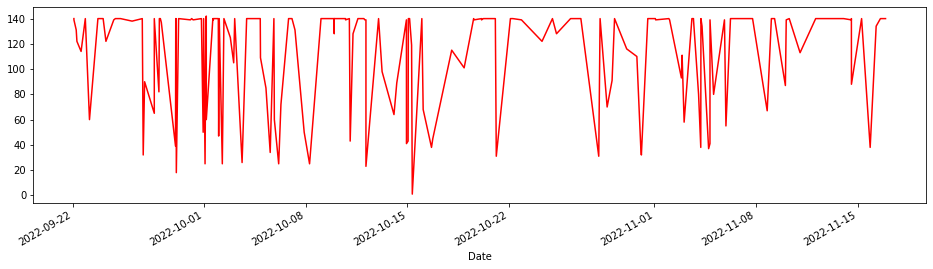

In [18]:
# Lenghts along time:
tlen.plot(figsize=(16,4), color='r');

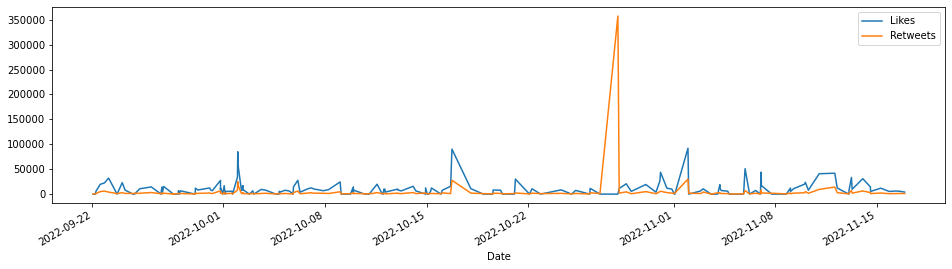

In [19]:
# Likes vs retweets visualization:
tfav.plot(figsize=(16,4), label="Likes", legend=True)
tret.plot(figsize=(16,4), label="Retweets", legend=True);

In [20]:
# We obtain all possible sources:
sources = []
for source in data['Source']:
    if source not in sources:
        sources.append(source)

# We print sources list:
print("Creation of content sources:")
for source in sources:
    print("* {}".format(source))

Creation of content sources:
* Twitter for iPhone
* Twitter Media Studio
* Twitter Web App


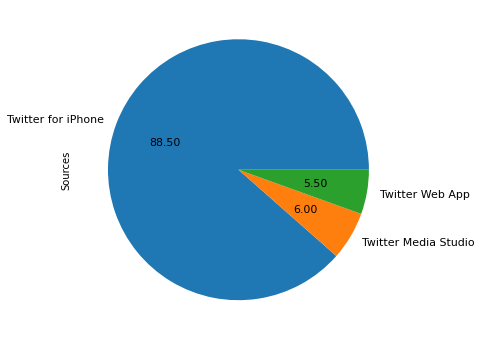

In [21]:
# We create a numpy vector mapped to labels:
percent = np.zeros(len(sources))

for source in data['Source']:
    for index in range(len(sources)):
        if source == sources[index]:
            percent[index] += 1
            pass

percent /= 100

# Pie chart:
pie_chart = pd.Series(percent, index=sources, name='Sources')
pie_chart.plot.pie(fontsize=11, autopct='%.2f', figsize=(6, 6));

## Sentiment Analysis
http://textblob.readthedocs.io/en/dev/

In [22]:
from textblob import TextBlob
import re

In [23]:
def clean_tweet(tweet):

    #tweet = tweet.decode('utf8') # change encoding    
    tweet = re.sub(r"@\w+", "", tweet) #remove twitter handle
    tweet = re.sub(r"\d", "", tweet) # remove numbers  
    tweet = re.sub(r"_+", "", tweet) # remove consecutive underscores
    tweet = tweet.lower() # tranform to lower case    
    
    return tweet.strip()

    #mydata["tweet_text_cleaned"] = mydata.tweet_text.apply(clean_text)
    #return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [24]:
# We create a column with the result of the analysis:
data['SA'] = np.array([ analize_sentiment(tweet) for tweet in data['Tweets'] ])

# We display the updated dataframe with the new column:
display(data.head(100))

,Tweets,len,ID,Date,Source,Likes,RTs,SA
0,¿Ya somos el país menos corrupto de América La...,140,1592995885860147202,2022-11-16 21:39:50,Twitter for iPhone,4091,1142,0
1,“El Salvador is one of the top destinations fo...,140,1592868277436698624,2022-11-16 13:12:46,Twitter for iPhone,5834,1253,1
2,0 homicidios.\n\nLos “expertos” decían que era...,134,1592761928203526145,2022-11-16 06:10:10,Twitter for iPhone,6158,1154,0
3,Frank Rubio 🇸🇻 https://t.co/IhKoTSONVL,38,1592612553813012480,2022-11-15 20:16:36,Twitter for iPhone,5331,868,0
4,"0 homicidios.\n\nLiteralmente, convirtiendo al...",140,1592398803986153472,2022-11-15 06:07:14,Twitter for iPhone,11881,2154,0
...,...,...,...,...,...,...,...,...
95,¡Yo quiero una! 😍 https://t.co/6vBVFzluBF,41,1581048975028690945,2022-10-14 22:27:04,Twitter for iPhone,12564,1658,0
96,RT @cidgallup: Aprobación del desempeño de pre...,139,1581047660639059968,2022-10-14 22:21:51,Twitter for iPhone,0,2221,0
97,0 homicidios.\n\nGracias a Dios.\n\nSeguimos…\...,89,1580806795924164608,2022-10-14 06:24:44,Twitter for iPhone,6422,1046,0
98,Después de 3 años y 4 meses en el cargo… https...,64,1580737367874228224,2022-10-14 01:48:51,Twitter for iPhone,15673,3129,0


In [25]:
# We construct lists with classified tweets:

pos_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] < 0]

In [26]:
# We print percentages:

print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(data['Tweets'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(data['Tweets'])))
print("Percentage de negative tweets: {}%".format(len(neg_tweets)*100/len(data['Tweets'])))

Percentage of positive tweets: 15.5%
Percentage of neutral tweets: 82.0%
Percentage de negative tweets: 2.5%


## Identify Topics

In [27]:
data['clean_tweet'] = np.array([ clean_tweet(tweet) for tweet in data['Tweets'] ])

In [28]:
preprocessed = [" ".join(RegexpTokenizer(r'\w+').\
                         tokenize(data.clean_tweet[idx])) \
                for idx in data.index]

### tf-idf matrix
In order to use non-negative matrix factorization, we'll calculate the tf-idf matrix first. You can add your own stop words to the "custom_stop_words" list.
http://scikit-learn.org/stable/modules/feature_extraction.html

In [29]:
custom_stop_words = []
my_stop_words = text.ENGLISH_STOP_WORDS.union(custom_stop_words)

vectorizer = TfidfVectorizer(min_df = 1, ngram_range = (1,1), 
                             stop_words = my_stop_words)

tfidf = vectorizer.fit_transform(preprocessed)
print ("Created document-term matrix of size %d x %d" \
    % (tfidf.shape[0],tfidf.shape[1]))

Created document-term matrix of size 200 x 1229


### NMF Analysis

In [30]:
nmf = decomposition.NMF(init = 'nndsvd', n_components = 6, max_iter = 200)
W = nmf.fit_transform(tfidf)
H = nmf.components_
print ("Generated factor W of size %s and factor H of size %s" \
% ( str(W.shape), str(H.shape) ))

feature_names = vectorizer.get_feature_names()

n_top_words = 10

#%% print top words in each topic
for topic_idx, topic in enumerate(H):
    print("Topic #%d:" % topic_idx)
    print(" ".join([feature_names[i]
                    for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

Generated factor W of size (200, 6) and factor H of size (6, 1229)
Topic #0:
la que en https del se lo para al días

Topic #1:
el salvador rt bitcoin pm come right history et article

Topic #2:
seguimos guerracontrapandillas homicidios resultados https acompañadas deben palabras dios ir

Topic #3:
los derechos humanos por equipos que pandilleros en las todos

Topic #4:
esta portada diarioelsalvador diarioes este es jueves octubre la más

Topic #5:
rt interview https bukele president man miclisost dqitlglueb sztflqaku watch



C:\Users\pablo\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,
C:\Users\pablo\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [31]:
# prediction example
text_new = preprocessed[0:5]
tfidf_new = vectorizer.transform(text_new)
W_new = nmf.transform(tfidf_new)

In [32]:
from textblob import TextBlob

testimonial = TextBlob("Textblob is amazingly simple to use. What great fun!")
testimonial.sentiment



Sentiment(polarity=0.39166666666666666, subjectivity=0.4357142857142857)

In [33]:
testimonial.sentiment.polarity

0.39166666666666666